# Qualitative Analysis of Generated Dialogues

<p align="right" style="margin-right: 8px;">
    <a target="_blank" href="https://colab.research.google.com/github/idiap/sdialog/blob/main/tutorials/4.dialog_analysis.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
</p>

Before we begin, let's make sure we have the environment all set up...

In [2]:
# Setup the environment depending on weather we are running in Google Colab or Jupyter Notebook
from IPython import get_ipython

colab = False
if "google.colab" in str(get_ipython()):
    print("Running on CoLab")
    from PIL import Image
    colab = True

    # Downloading only the "output" directory from the repository
    !git init .
    !git remote add -f origin https://github.com/Play-Your-Part/tutorials.git
    !git config core.sparseCheckout true
    !echo "output" >> .git/info/sparse-checkout
    !git pull origin main

    # Installing Ollama
    !curl -fsSL https://ollama.com/install.sh | sh
    %pip install simpleneighbors

    # Installing sdialog
    !git clone https://github.com/idiap/sdialog.git
    %cd sdialog
    %pip install -e .
    %cd ..
else:
    print("Running in Jupyter Notebook")
    # Little hack to avoid the "OSError: Background processes not supported." error in Jupyter notebooks"
    import os
    get_ipython().system = os.system

Running in Jupyter Notebook


> ⚠️ If you're using **Colab**, please, **restart the runtime** once everything above is installed

Let's make sure we have ollama server running...

In [ ]:
!OLLAMA_KEEP_ALIVE=-1 ollama serve > /dev/null 2>&1 &
!sleep 10

Let's set the default llm used by sdialog to be `qwen2.5:14b`

In [1]:
import sdialog

sdialog.config.llm("qwen2.5:14b")

Let's make sure we have the STAR dataset downloaded inside the `datasets` folder:

In [3]:
# Let's clone the STAR dataset repository
!git clone https://github.com/RasaHQ/STAR.git datasets/STAR

# Let's check that `dialogues` and `tasks` folders are inside `datasets/STAR`
!ls datasets/STAR

LICENSE.txt
README.md
apis
dialogues
tasks


fatal: destination path 'datasets/STAR' already exists and is not an empty directory.


0

And let's import the needed modules:

In [4]:
from sdialog.datasets import STAR

STAR_PATH = "datasets/STAR/"
STAR.set_path(STAR_PATH)

[2025-07-09 14:29:27] INFO:datasets:PyTorch version 2.7.0 available.


0

Let's also use a little hack to make sure plots are not toooo big when displayed.

In [5]:
%%html
<style>
img {
    max-height: 768px !important;
    height: auto !important;
}
</style>

Great, let's begin! :)

## Flow-based Analysis

### Original dialogues

In previous tutorials we have generated and saved one synthethic dialogue for each original happy dialogue for the "doctor_followup" task.

In this tutorial we will analyse the generated dialogues against the original ones, we first we need to save the original ones as we did with the synthethic ones.

Get the original dialogues:

In [6]:
original_dialogs = STAR.get_dialogs(task_name="doctor_followup", happy=True, multitask=False)
print('Total number of happy "doctor_followup" dialogues:', len(original_dialogs))

Reading dialogs:   0%|          | 0/6652 [00:00<?, ?it/s]

Total number of happy "doctor_followup" dialogues: 105


In [7]:
original_dialogs[1].print()

[dialog_id] 1848
--- Dialogue Begins ---
[User] Hi
[System] Hello, how can I help?
[User] I'm John I just finished an appointment with Dr Morgan and I would like a follow up to ensure I got everything right
[System] Your instructions are: You must take your medicine 2 times a day before meals..
[User] Oh! Thanks
[System] Is there anything else that I can do for you?
[User] That would be all 
[System] Have a great day!
--- Dialogue Ends ---


#### Conversational Graph Generation

Now that we have the dialogues saved in `PATH_OUTPUT`, let's use the `dialog2graph` function to analyze all the dialogues in this folder and produce a global action transition graph that represent them:

Dialogues::   0%|          | 0/105 [00:00<?, ?it/s]

[2025-07-09 14:30:28] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 14:30:28] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering SYSTEM utterances...


Cluster labels (System)::   0%|          | 0/16 [00:00<?, ?it/s]

[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 16
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 446
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering USER utterances...


Cluster labels (User)::   0%|          | 0/55 [00:00<?, ?it/s]

[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 55
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 448
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.build_graph:  Reading trajectories from (.dialog2flow/trajectories-dialog2flow-joint-bert-base.json)...
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.build_graph:    105 trajectories read.
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.build_graph:  About to start creating the graph...
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.build_graph:Found 6 unique labels with repeated nodes to marge
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.build_graph:    > Number of nodes before mergin duplicates: 73
[2025-07-09 14:30:30] INFO:sdialog.evaluation.dialog2flow.build_graph:    > Number of

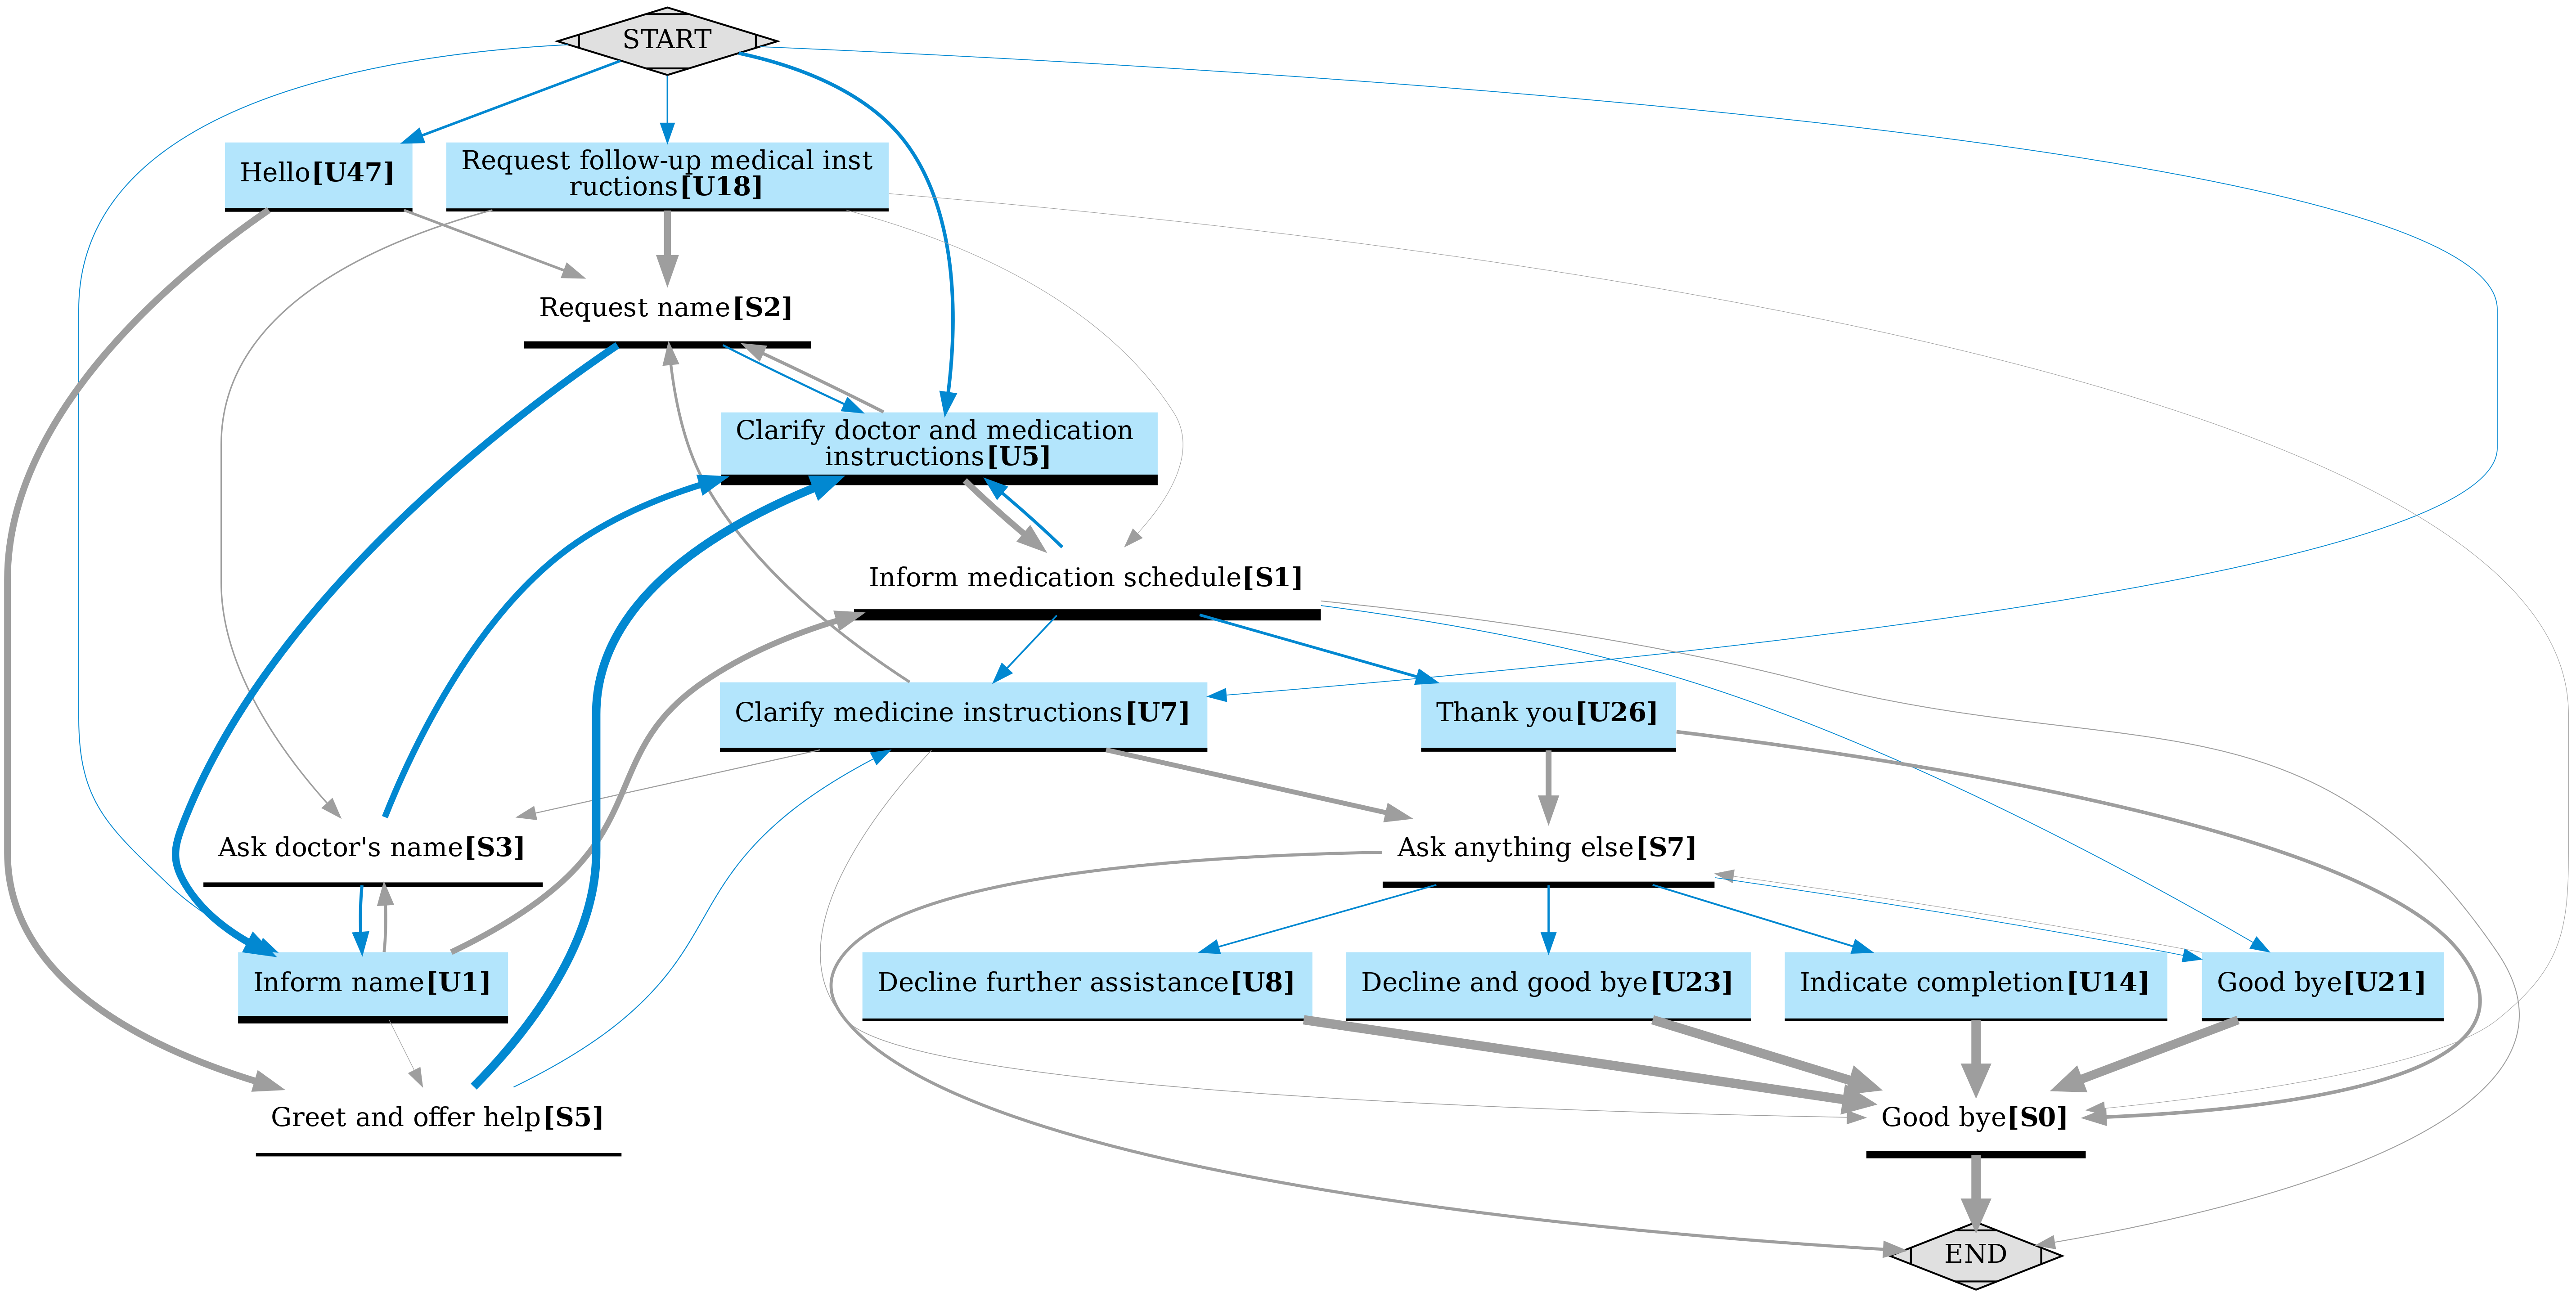

[2025-07-09 14:30:31] INFO:sdialog.evaluation.dialog2flow.build_graph:  Finished creating the graph.


In [11]:
from sdialog.evaluation.dialog2flow import dialog2graph

graph, nodes = dialog2graph(original_dialogs)

if colab:
    display(Image.open(".dialog2flow/graph/dialog2flow-joint-bert-base/graph.png"))

In the above graph, white nodes are System nodes while blue ones are User nodes.

We can see that the "discovered" graph after the analysis essentially shows a similar flow as the one we know was used for the orchestration under the hood, for this task:

In [12]:
print(STAR.read_graph("doctor_followup"))  # System original graph

digraph doctor_followup  {
    hello -> ask_name;
    ask_name -> doctor_ask_doctor_name;
    doctor_ask_doctor_name -> query;
    query -> doctor_inform_doctors_instructions;
    doctor_inform_doctors_instructions -> anything_else
}


However, note that the graph shown in the figure above was built without any annotation or knowledge about the original graph, just from the content of the conversations alone (text) and still managed to reveal an underline flow that matches closely the real one. This implyes that the humans who create the original dialogues were correctly role playing the characters and produced final dialogues matching the expected flow.

Note that the `dialog2graph()` function returned a `graph` and a `nodes` object, the first one is the graph as a [`NetworkX`](https://networkx.org/)'s [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) object:

In [13]:
graph

And the second one, allow us to get the top-k utterances that were used under the hood to create/discover each node.

We can use it to analyse and debug each step by using the provided codes (e.g. `[U8]`) shown at the end of each node name.

For instance, let's see the utterances associated to the "Decline offer and good bye [U23]" step:

In [14]:
nodes["u23"]

{'name': 'Decline and good bye',
 'utterances': ['No, thank you. Goodbye.',
  'No, thank you. Goodbye.',
  'No thank you. Bye.',
  'No. Thanks. Have a good day.',
  'No. Thanks. Have a good day.']}

Alternatively, we can perform this analysis using the the interactive HTML visualization by setting the `out_interactive=True` argument:

In [15]:
_, _ = dialog2graph(original_dialogs, out_interactive=True, out_png=False)

Dialogues::   0%|          | 0/105 [00:00<?, ?it/s]

[2025-07-09 14:30:51] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 14:30:51] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering SYSTEM utterances...


Cluster labels (System)::   0%|          | 0/16 [00:00<?, ?it/s]

[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 16
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 446
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering USER utterances...


Cluster labels (User)::   0%|          | 0/55 [00:00<?, ?it/s]

[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 55
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 448
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.build_graph:  Reading trajectories from (.dialog2flow/trajectories-dialog2flow-joint-bert-base.json)...
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.build_graph:    105 trajectories read.
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.build_graph:  About to start creating the graph...
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.build_graph:Found 6 unique labels with repeated nodes to marge
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.build_graph:    > Number of nodes before mergin duplicates: 73
[2025-07-09 14:30:53] INFO:sdialog.evaluation.dialog2flow.build_graph:    > Number of

You can now download the [.dialog2flow/graph/dialog2flow-joint-bert-base/visualization](.dialog2flow/graph/dialog2flow-joint-bert-base/visualization) folder and open the graph.html file inside it to view the interactive visualization. Hover over nodes to see the utterances associated with them.

> 💡 In **Colab**, open a terminal (left bottom corner), then run:
> ```bash
> cd .dialog2flow/graph/dialog2flow-joint-bert-base
> tar -czvf visualization.tar.gz visualization/
> ```
> Next, open the Files panel (make sure hidden files are visible via the eye icon), navigate to `.dialog2flow/graph/dialog2flow-joint-bert-base`, right‑click `visualization.tar.gz`, and choose Download.

### Single LLM Full Dialog Generation

Instead of a list of `Dialog`s, `dialog2graph()` can take a path where the dialogues are located, by default the generated graph files will be saved inside a "dialog2flow" folder inside the provided (input) path. You can overwrite where to save the graph using the `output_path` argument of `dialog2graph()`.

[2025-07-09 14:32:20] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

Dialogues::   0%|          | 0/105 [00:00<?, ?it/s]

[2025-07-09 14:32:22] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 14:32:22] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[2025-07-09 14:32:24] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering SYSTEM utterances...


Cluster labels (System)::   0%|          | 0/10 [00:00<?, ?it/s]

[2025-07-09 14:33:32] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 10
[2025-07-09 14:33:32] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 14:33:32] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 565
[2025-07-09 14:33:32] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering USER utterances...


Cluster labels (User)::   0%|          | 0/11 [00:00<?, ?it/s]

[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 11
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 458
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.build_graph:  Reading trajectories from (output/STAR/full-generation/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json)...
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.build_graph:    105 trajectories read.
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.build_graph:  About to start creating the graph...
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.build_graph:Found 2 unique labels with repeated nodes to marge
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2flow.build_graph:    > Number of nodes before mergin duplicates: 23
[2025-07-09 14:33:34] INFO:sdialog.evaluation.dialog2f

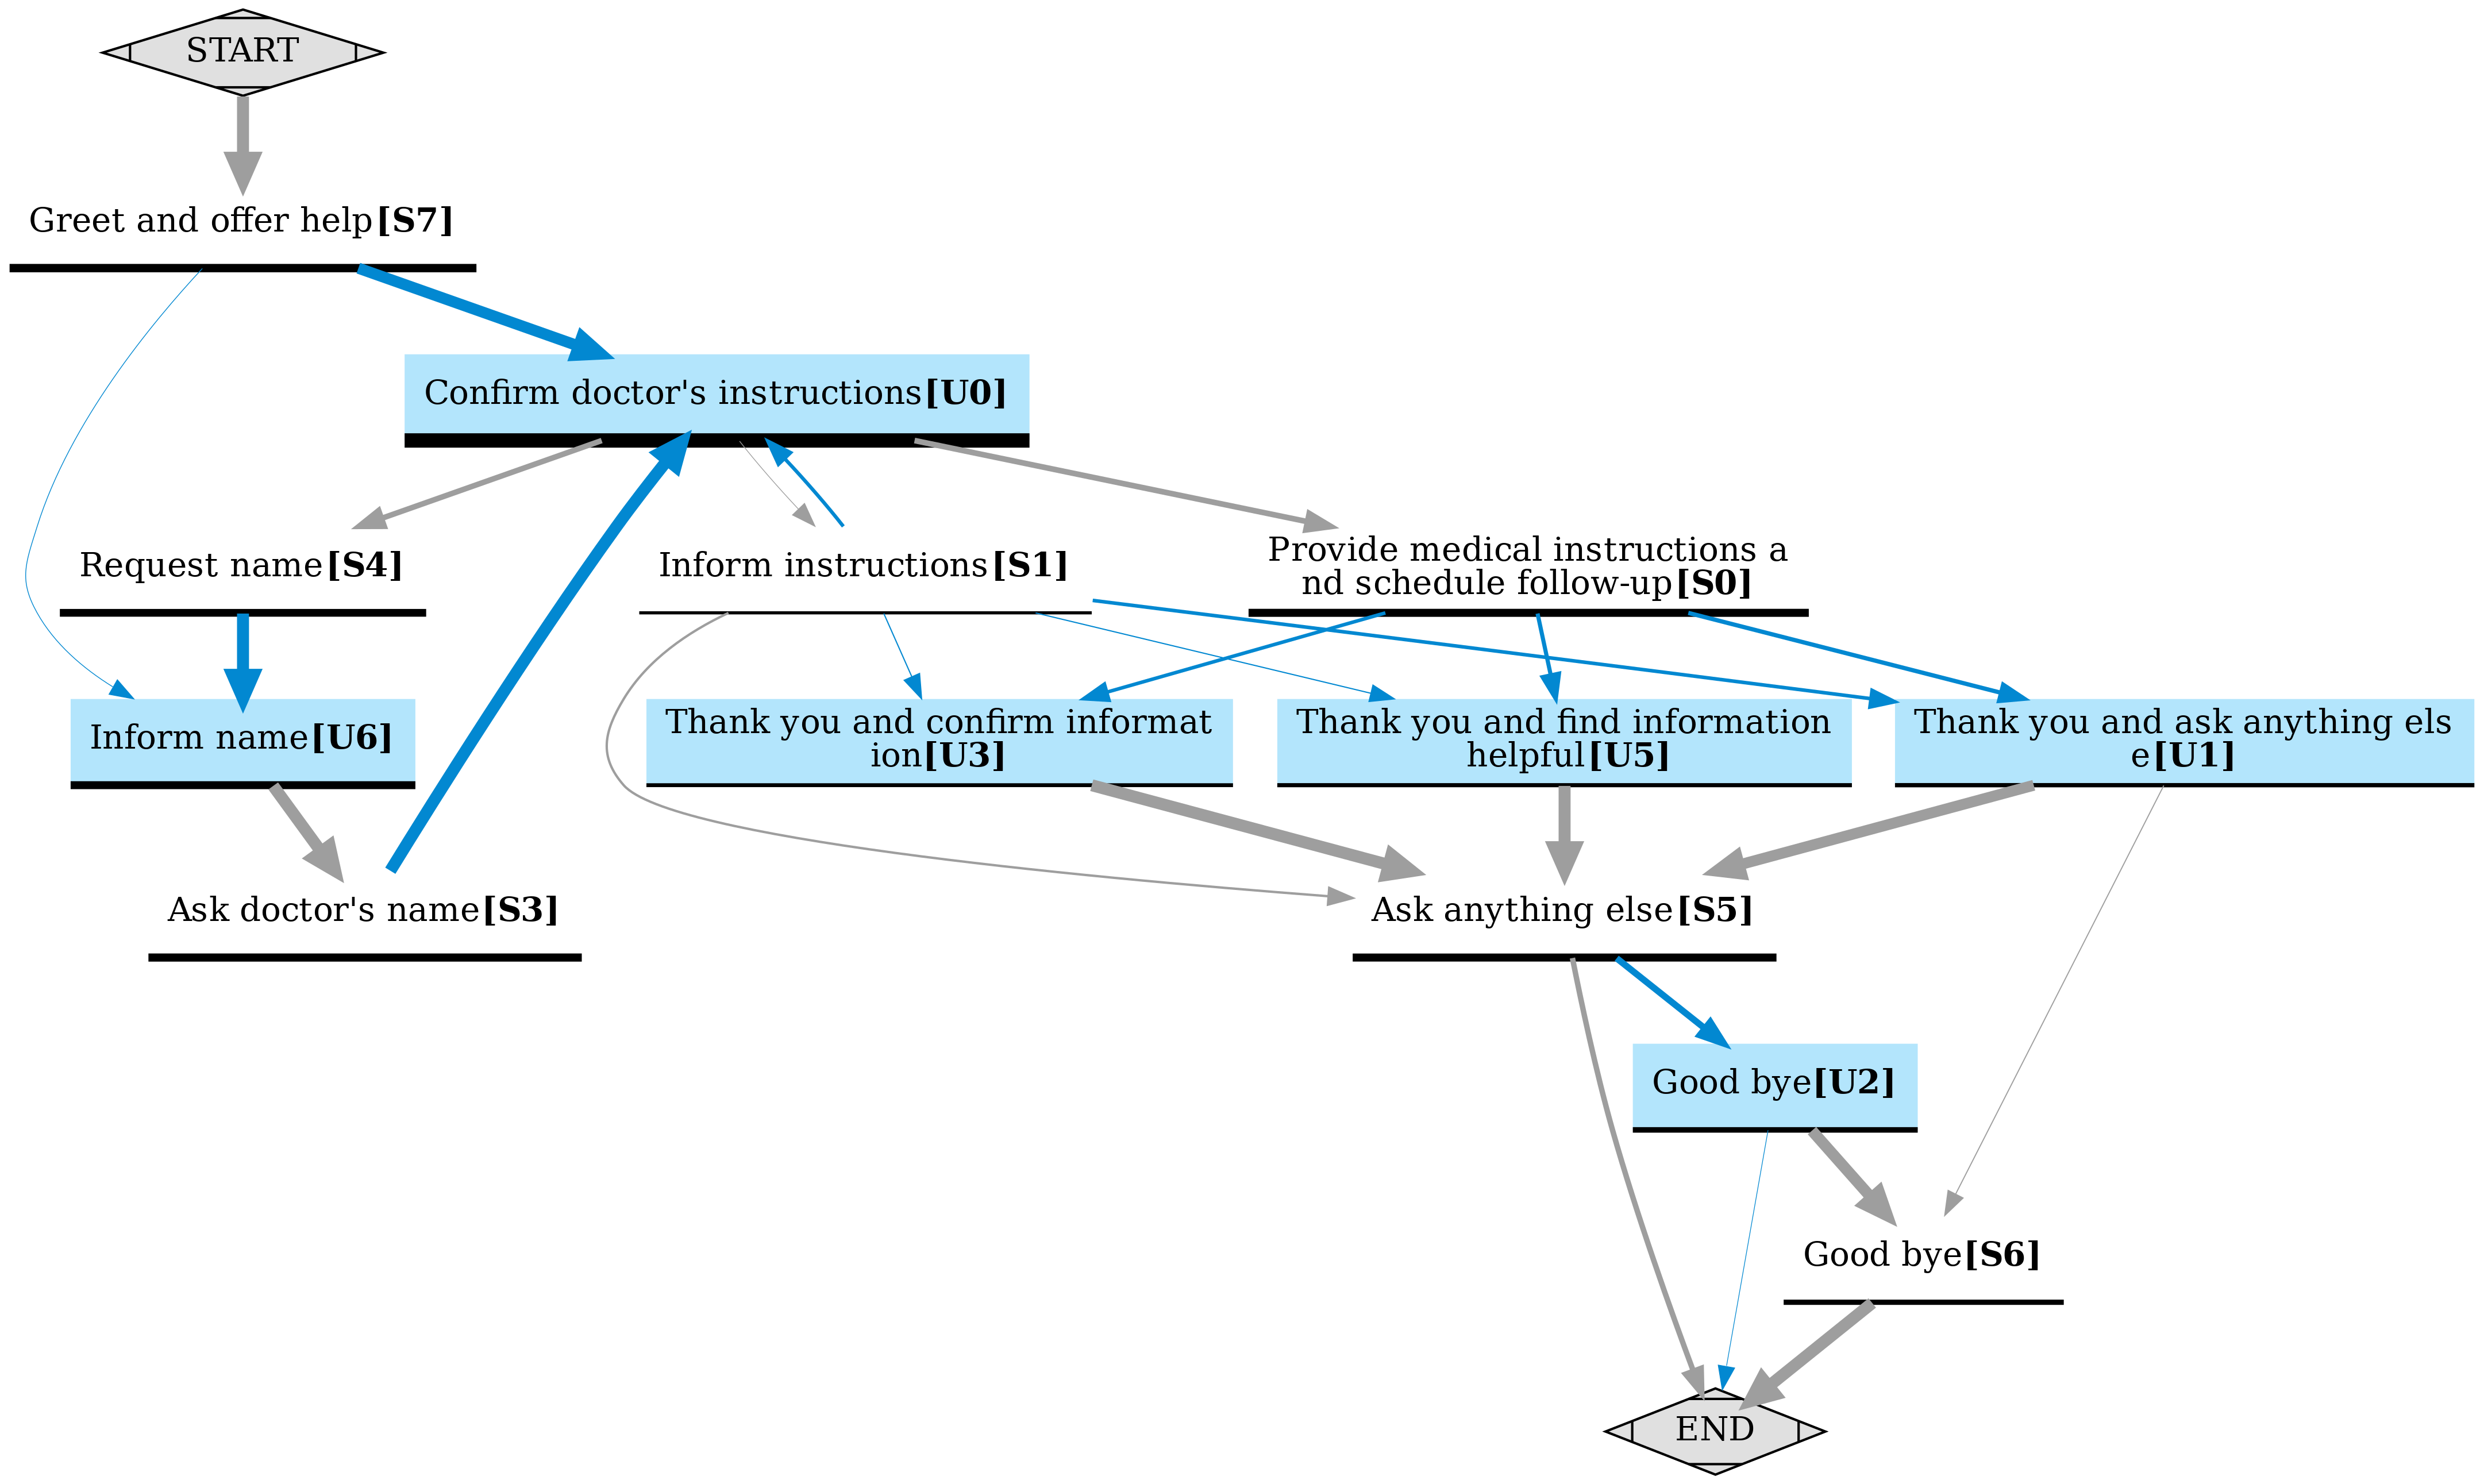

[2025-07-09 14:33:36] INFO:sdialog.evaluation.dialog2flow.build_graph:  Finished creating the graph.


In [16]:
_, nodes = dialog2graph("output/STAR/full-generation/txt")

if colab:
    display(Image.open("output/STAR/full-generation/txt/dialog2flow/graph/dialog2flow-joint-bert-base/graph.png"))

The graph looks quite good, and resambles a similar flow as the original one.

However, why do we have seemly duplicated _"Provide medical instructions [S0]"_ and _"Inform instructions [S1]"_ nodes? let's see what are the utterances used for their labels:

In [14]:
nodes["s0"]

{'name': 'Provide medical instructions and schedule follow-up',
 'utterances': ['Your instructions are: Take the prescribed medication twice daily with meals and schedule another appointment in two months. Also, monitor your blood pressure daily and report any unusual symptoms to our clinic immediately.',
  'Your instructions are: Take the prescribed medication twice a day, maintain a healthy diet and regular exercise routine, and schedule a follow-up appointment in six weeks.',
  'Your instructions are: Take the prescribed medication twice a day, monitor your blood pressure daily and schedule another appointment in two weeks for a follow-up.',
  'Your instructions are: Take the prescribed medication twice daily for two weeks, drink plenty of water and return to the office in four weeks for a follow-up visit.',
  'Your instructions are: Take the prescribed medication twice a day, and follow up with an appointment in two weeks to review progress.']}

In [15]:
nodes["s1"]

{'name': 'Inform instructions',
 'utterances': ['Your instructions are: INSTRUCTIONS.',
  'Your instructions are: INSTRUCTIONS.',
  'Your instructions are: INSTRUCTIONS.',
  'Your instructions are: INSTRUCTIONS.',
  'Your instructions are: INSTRUCTIONS.']}

So it seems the LLM had issues when generating the System turn that inform the instructions in some cases, since in the "Inform instructions [S1]" node we can see there are dialogs in which the instructions were given literally as a template!

And what about the user step "Thank you and ask anything else", the user is not suppose to ask for anything else, but the system. Let's check the node:

In [16]:
nodes["u1"]

{'name': 'Thank you and ask anything else',
 'utterances': ['Thank you. Is there anything else I should know?',
  'Thank you. Is there anything else I should know?',
  'Thank you. Is there anything else I should know?',
  'Thank you! Is there anything else I need to know?',
  'Thank you! Is there anything else I need to know?']}

Ok, "anything else" in the name was referring to _anything else the user should know_, which is fine.

### Role-Play Multi-Agent-based Generation

[2025-07-09 15:08:38] INFO:dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

[2025-07-09 15:08:39] INFO:dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 15:08:39] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

[2025-07-09 15:08:42] INFO:dialog2flow.extract_trajectories:Clustering SYSTEM utterances...


Cluster labels (System)::   0%|          | 0/9 [00:00<?, ?it/s]

[2025-07-09 15:08:45] INFO:dialog2flow.extract_trajectories:# clusters: 9
[2025-07-09 15:08:45] INFO:dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:08:45] INFO:dialog2flow.extract_trajectories:# Total predictions: 575
[2025-07-09 15:08:45] INFO:dialog2flow.extract_trajectories:Clustering USER utterances...


Cluster labels (User)::   0%|          | 0/15 [00:00<?, ?it/s]

[2025-07-09 15:08:48] INFO:dialog2flow.extract_trajectories:# clusters: 15
[2025-07-09 15:08:48] INFO:dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:08:48] INFO:dialog2flow.extract_trajectories:# Total predictions: 470
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:  Reading trajectories from (output/STAR/multi-agents/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json)...
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:    105 trajectories read.
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:  About to start creating the graph...
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:Found 2 unique labels with repeated nodes to marge
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:    > Number of nodes before mergin duplicates: 26
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:    > Number of nodes after mergin duplicates: 24
[2025-07-09 15:08:48] INFO:dialog2flow.build_graph:  #Nodes before pruning: 24
[2025-07-09 15:08:48] INFO:di

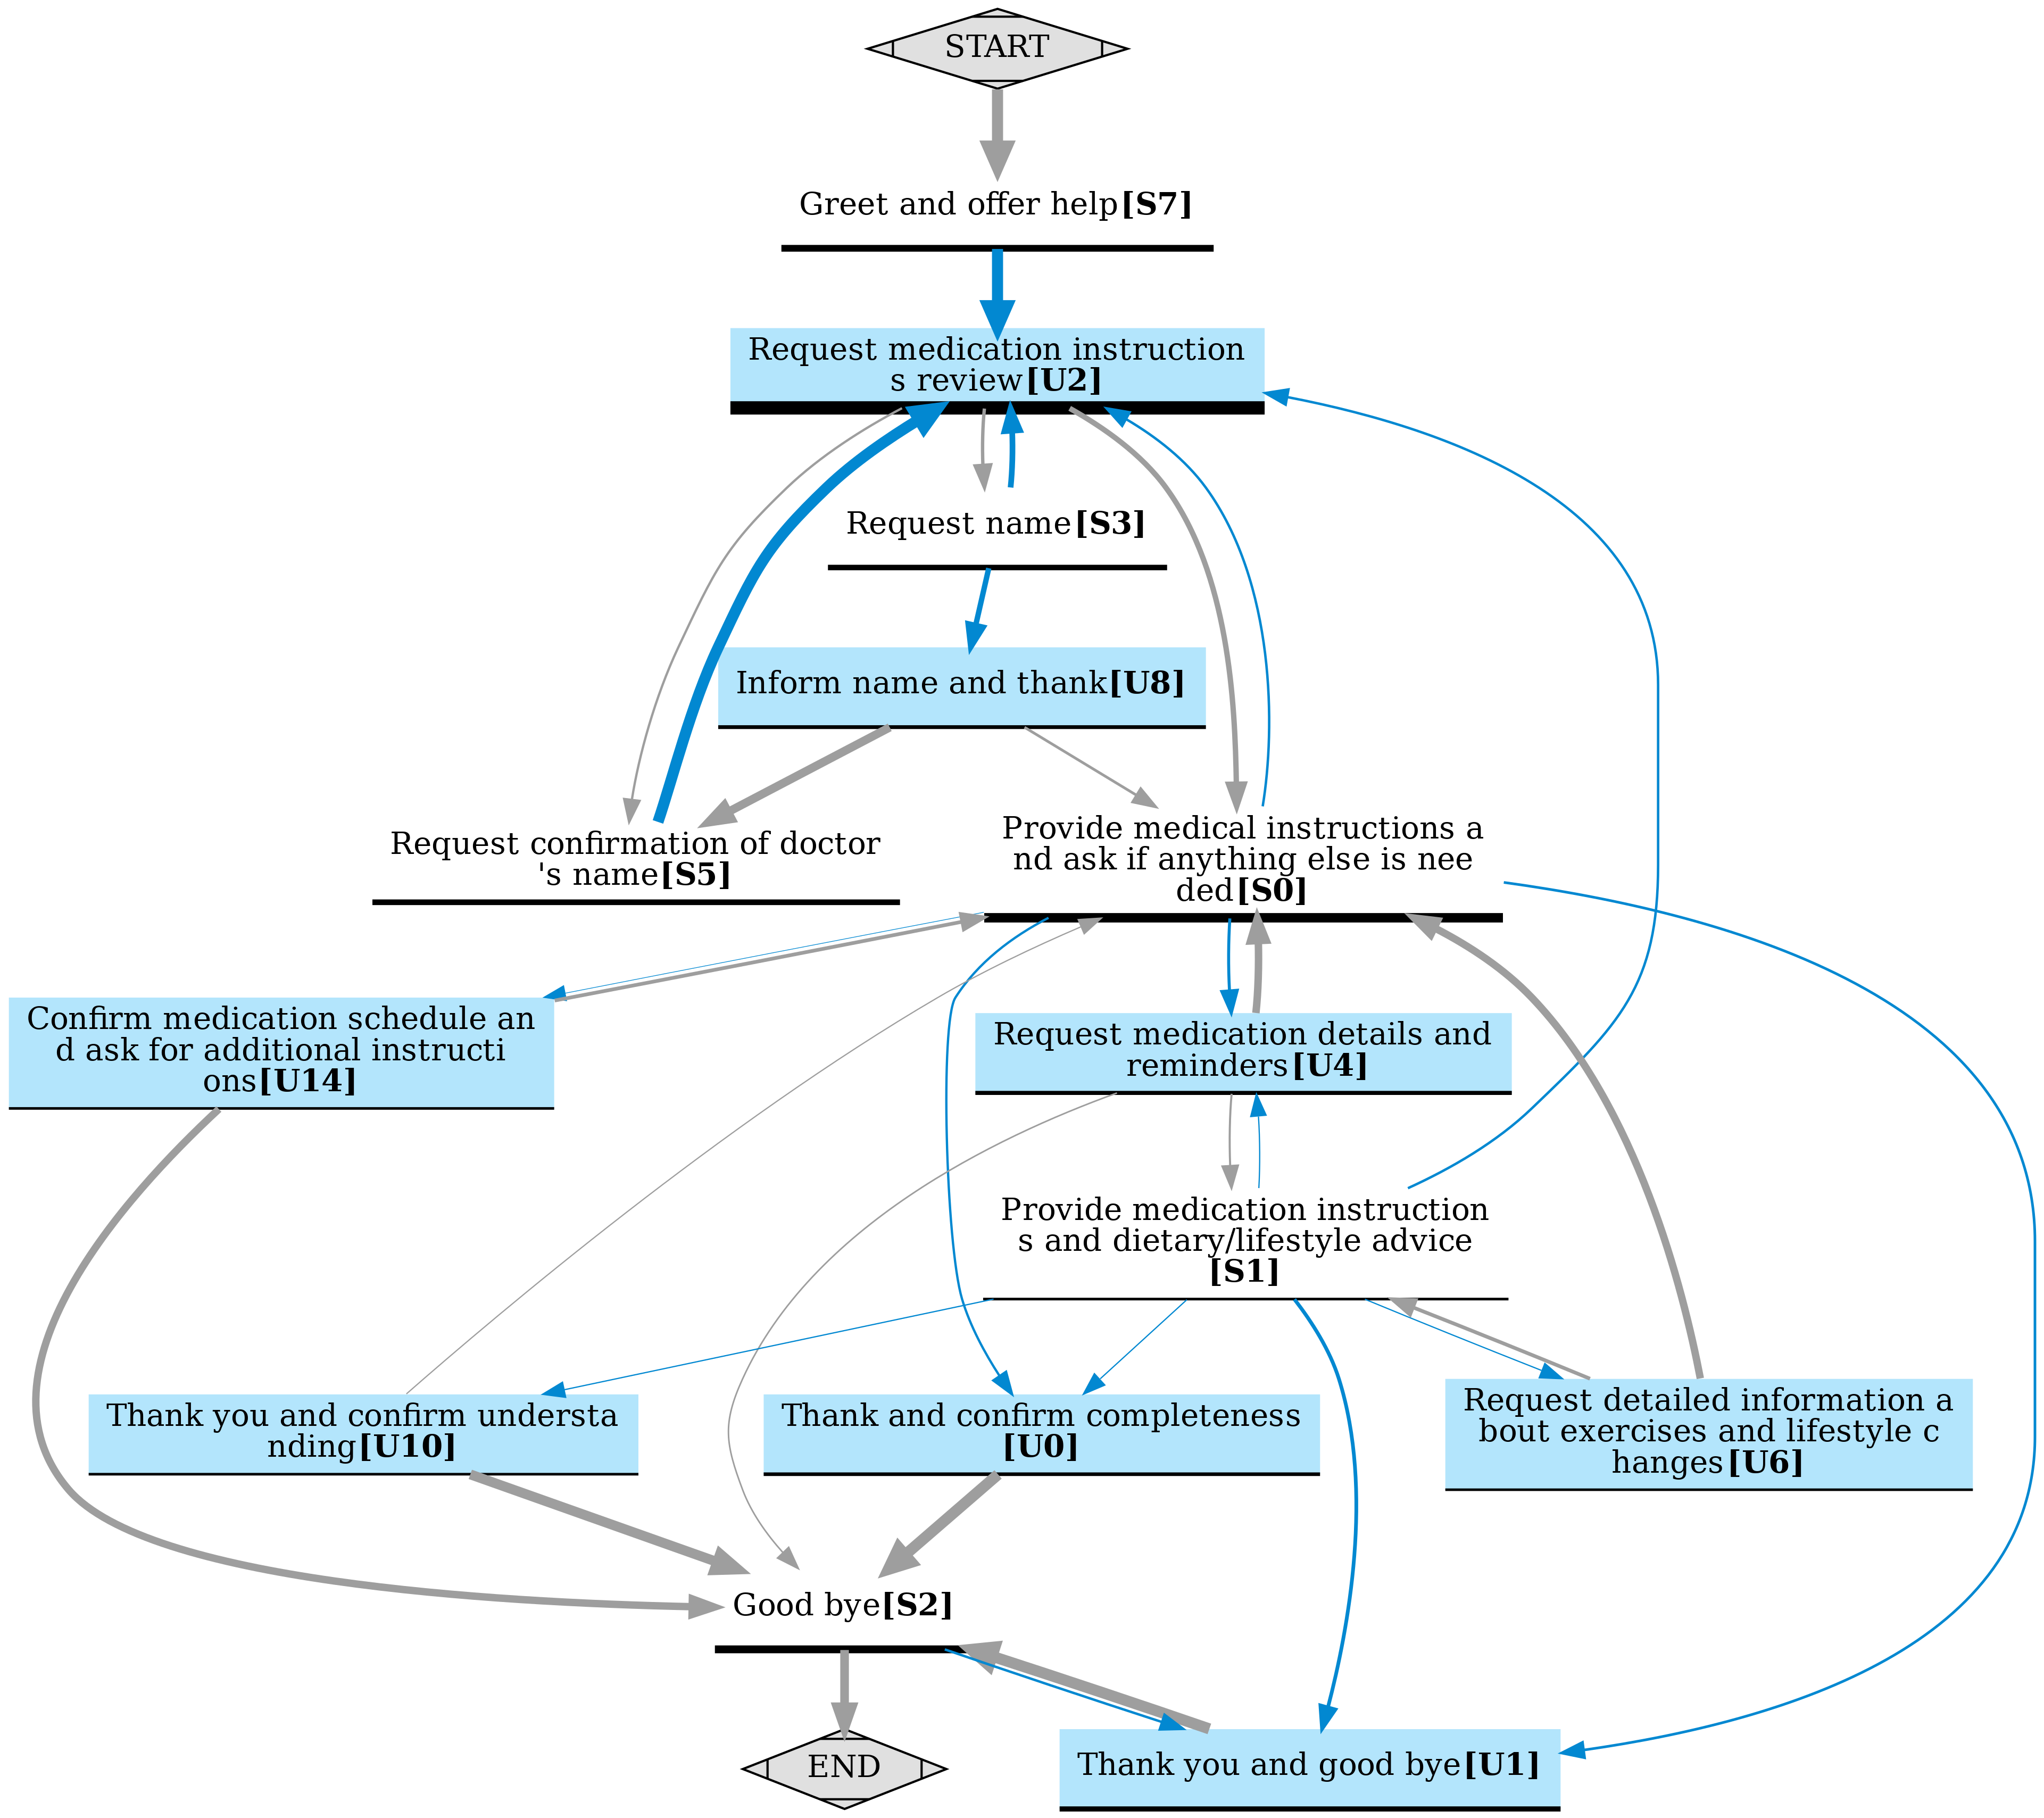

[2025-07-09 15:08:49] INFO:dialog2flow.build_graph:  Finished creating the graph.


In [17]:
from sdialog.evaluation.dialog2flow import dialog2graph

_, nodes = dialog2graph("output/STAR/multi-agents/txt", node_thresholds=.45)

if colab:
    display(Image.open("output/STAR/multi-agents/txt/dialog2flow/graph/dialog2flow-joint-bert-base/graph.png"))

We can see this graph is a little bit more complex than the ones before, with more user steps and some steps involving multiple actions.

For instance, there's no single step for system asking for the doctor's name, but rather a `"Request confirmation of doctor's name [S5]"` because the user normally inform the doctor name while requesting for medication clarification (i.e. `"Request clarification on medication instructions FROM DOCTOR [U2]"`). Let's check these nodes:

In [49]:
nodes["u2"]

{'name': 'Request clarification on medication instructions from doctor',
 'utterances': ['Hi! I just had my appointment with Dr. Alexis but forgot to write down her instructions. Could you please tell me how often I should take my medication?',
  'Hi! I was wondering if Dr. Johnson is available for a quick follow-up call? We had an appointment last week and I want to make sure I understood everything correctly regarding my medication regimen.',
  'Hi, this is Angela. I had an appointment with Dr. Johnson last week and I wanted to make sure I understood everything correctly regarding my treatment plan. Could you please help me review it?',
  'Yes, it’s Dr. Morgan. I had an appointment with her recently and she gave me some medication, but I forgot to write down how often I should take it. Could you help me with that, please?',
  'Hi, this is Ben. I had an appointment with Dr. Morgan last week and I want to make sure I understood everything correctly regarding my treatment plan. Could we

In [51]:
nodes["s5"]

{'name': "Request confirmation of doctor's name",
 'utterances': ['Who is your doctor, Mark? Just to confirm, is it Dr. Alexis?',
  "Who is your doctor, Mark? Just confirming it's Dr. Johnson we're discussing.",
  'Who is your doctor, Mark? Just to confirm, is it Dr. Johnson?',
  'Who is your doctor, John? Just to confirm, is it Dr. Alexis?',
  'Who is your doctor, John? Just to confirm, is it Dr. Alexis?']}

In addition, we can also see that this graph contains new user steps, for instance, after the system `"provide medical instructions and ask if anything else is needed [S0]"` now the user asked for more details like `"Request medication details and reminders [U4]"` or `"Request detailed information about exercises and lifestyle changes"`, let's check them:

In [44]:
nodes["u4"]

{'name': 'Request medication details and reminders',
 'utterances': ['Thanks for summarizing that. Could you remind me again of the specific dosage instructions for my medication and when I should take them? Also, are there any signs or symptoms I should be particularly aware of before my follow-up appointment in two weeks?',
  "Thanks for the details on the side effects and reassurance that no additional tests are needed right now. Could you also remind me of the dosage and timing for each medication? I want to make sure I'm taking them correctly.",
  'Thanks for summarizing that. Could we also review the side effects I should be aware of for my current medications? And maybe go over what to expect at the next appointment?',
  'Thanks for summarizing that. Could you remind me of the specific side effects I should be aware of while taking this new medication? And how often should I check my blood pressure at home?',
  "That's perfect, thank you! Could you remind me of the dosage for ea

In [45]:
nodes["u6"]

{'name': 'Request detailed information about exercises and lifestyle changes',
 'utterances': ['Thanks for that information! What about the strength training exercises—could we go over those in more detail as well? Are there specific types of equipment Dr. Morgan recommends, or can I use bodyweight exercises at home?',
  'Thanks for summarizing that. Could we go over the specific types of exercises Dr. Morgan recommended? I want to make sure I’m doing them correctly and safely.',
  'That’s really helpful. Could you also remind me of any lifestyle changes that might support my recovery besides diet and exercise? And do you have any tips for managing stress during this period? Thank you so much!',
  "That's very helpful. Could you also remind me of any lifestyle changes Dr. Alexis suggested along with the treatment plan?",
  'That’s very helpful! Could we discuss the types of aerobic activities in more detail? Are there any particular times of day that are better for these workouts, or i

This behavior is not necessarily a bad thing per se, in case we don't want such "more complex" behavior, now that we know that it exists, we could set special instructions to force the agents to associate one action per utterance only, and to not ask for more details about the given instructions. This changes may make sound more "robotic", less natural, though, as in the original conversations where humans where instructed to "stick to their scripts" though the orchestration. Let's check what happed with this multi-agent dialogues when we added orchestration too.

### Role-Play Multi-Agent-based Generation with Orchestration

[2025-07-09 15:09:28] INFO:dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

[2025-07-09 15:09:30] INFO:dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 15:09:30] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[2025-07-09 15:09:32] INFO:dialog2flow.extract_trajectories:Clustering SYSTEM utterances...


Cluster labels (System)::   0%|          | 0/10 [00:00<?, ?it/s]

[2025-07-09 15:09:35] INFO:dialog2flow.extract_trajectories:# clusters: 10
[2025-07-09 15:09:35] INFO:dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:09:35] INFO:dialog2flow.extract_trajectories:# Total predictions: 524
[2025-07-09 15:09:35] INFO:dialog2flow.extract_trajectories:Clustering USER utterances...


Cluster labels (User)::   0%|          | 0/12 [00:00<?, ?it/s]

[2025-07-09 15:09:37] INFO:dialog2flow.extract_trajectories:# clusters: 12
[2025-07-09 15:09:37] INFO:dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:09:37] INFO:dialog2flow.extract_trajectories:# Total predictions: 419
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:  Reading trajectories from (output/STAR/multi-agents+orchestration/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json)...
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:    105 trajectories read.
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:  About to start creating the graph...
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:Found 1 unique labels with repeated nodes to marge
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:    > Number of nodes before mergin duplicates: 24
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:    > Number of nodes after mergin duplicates: 23
[2025-07-09 15:09:37] INFO:dialog2flow.build_graph:  #Nodes before pruning: 23
[2025-07-09 15:

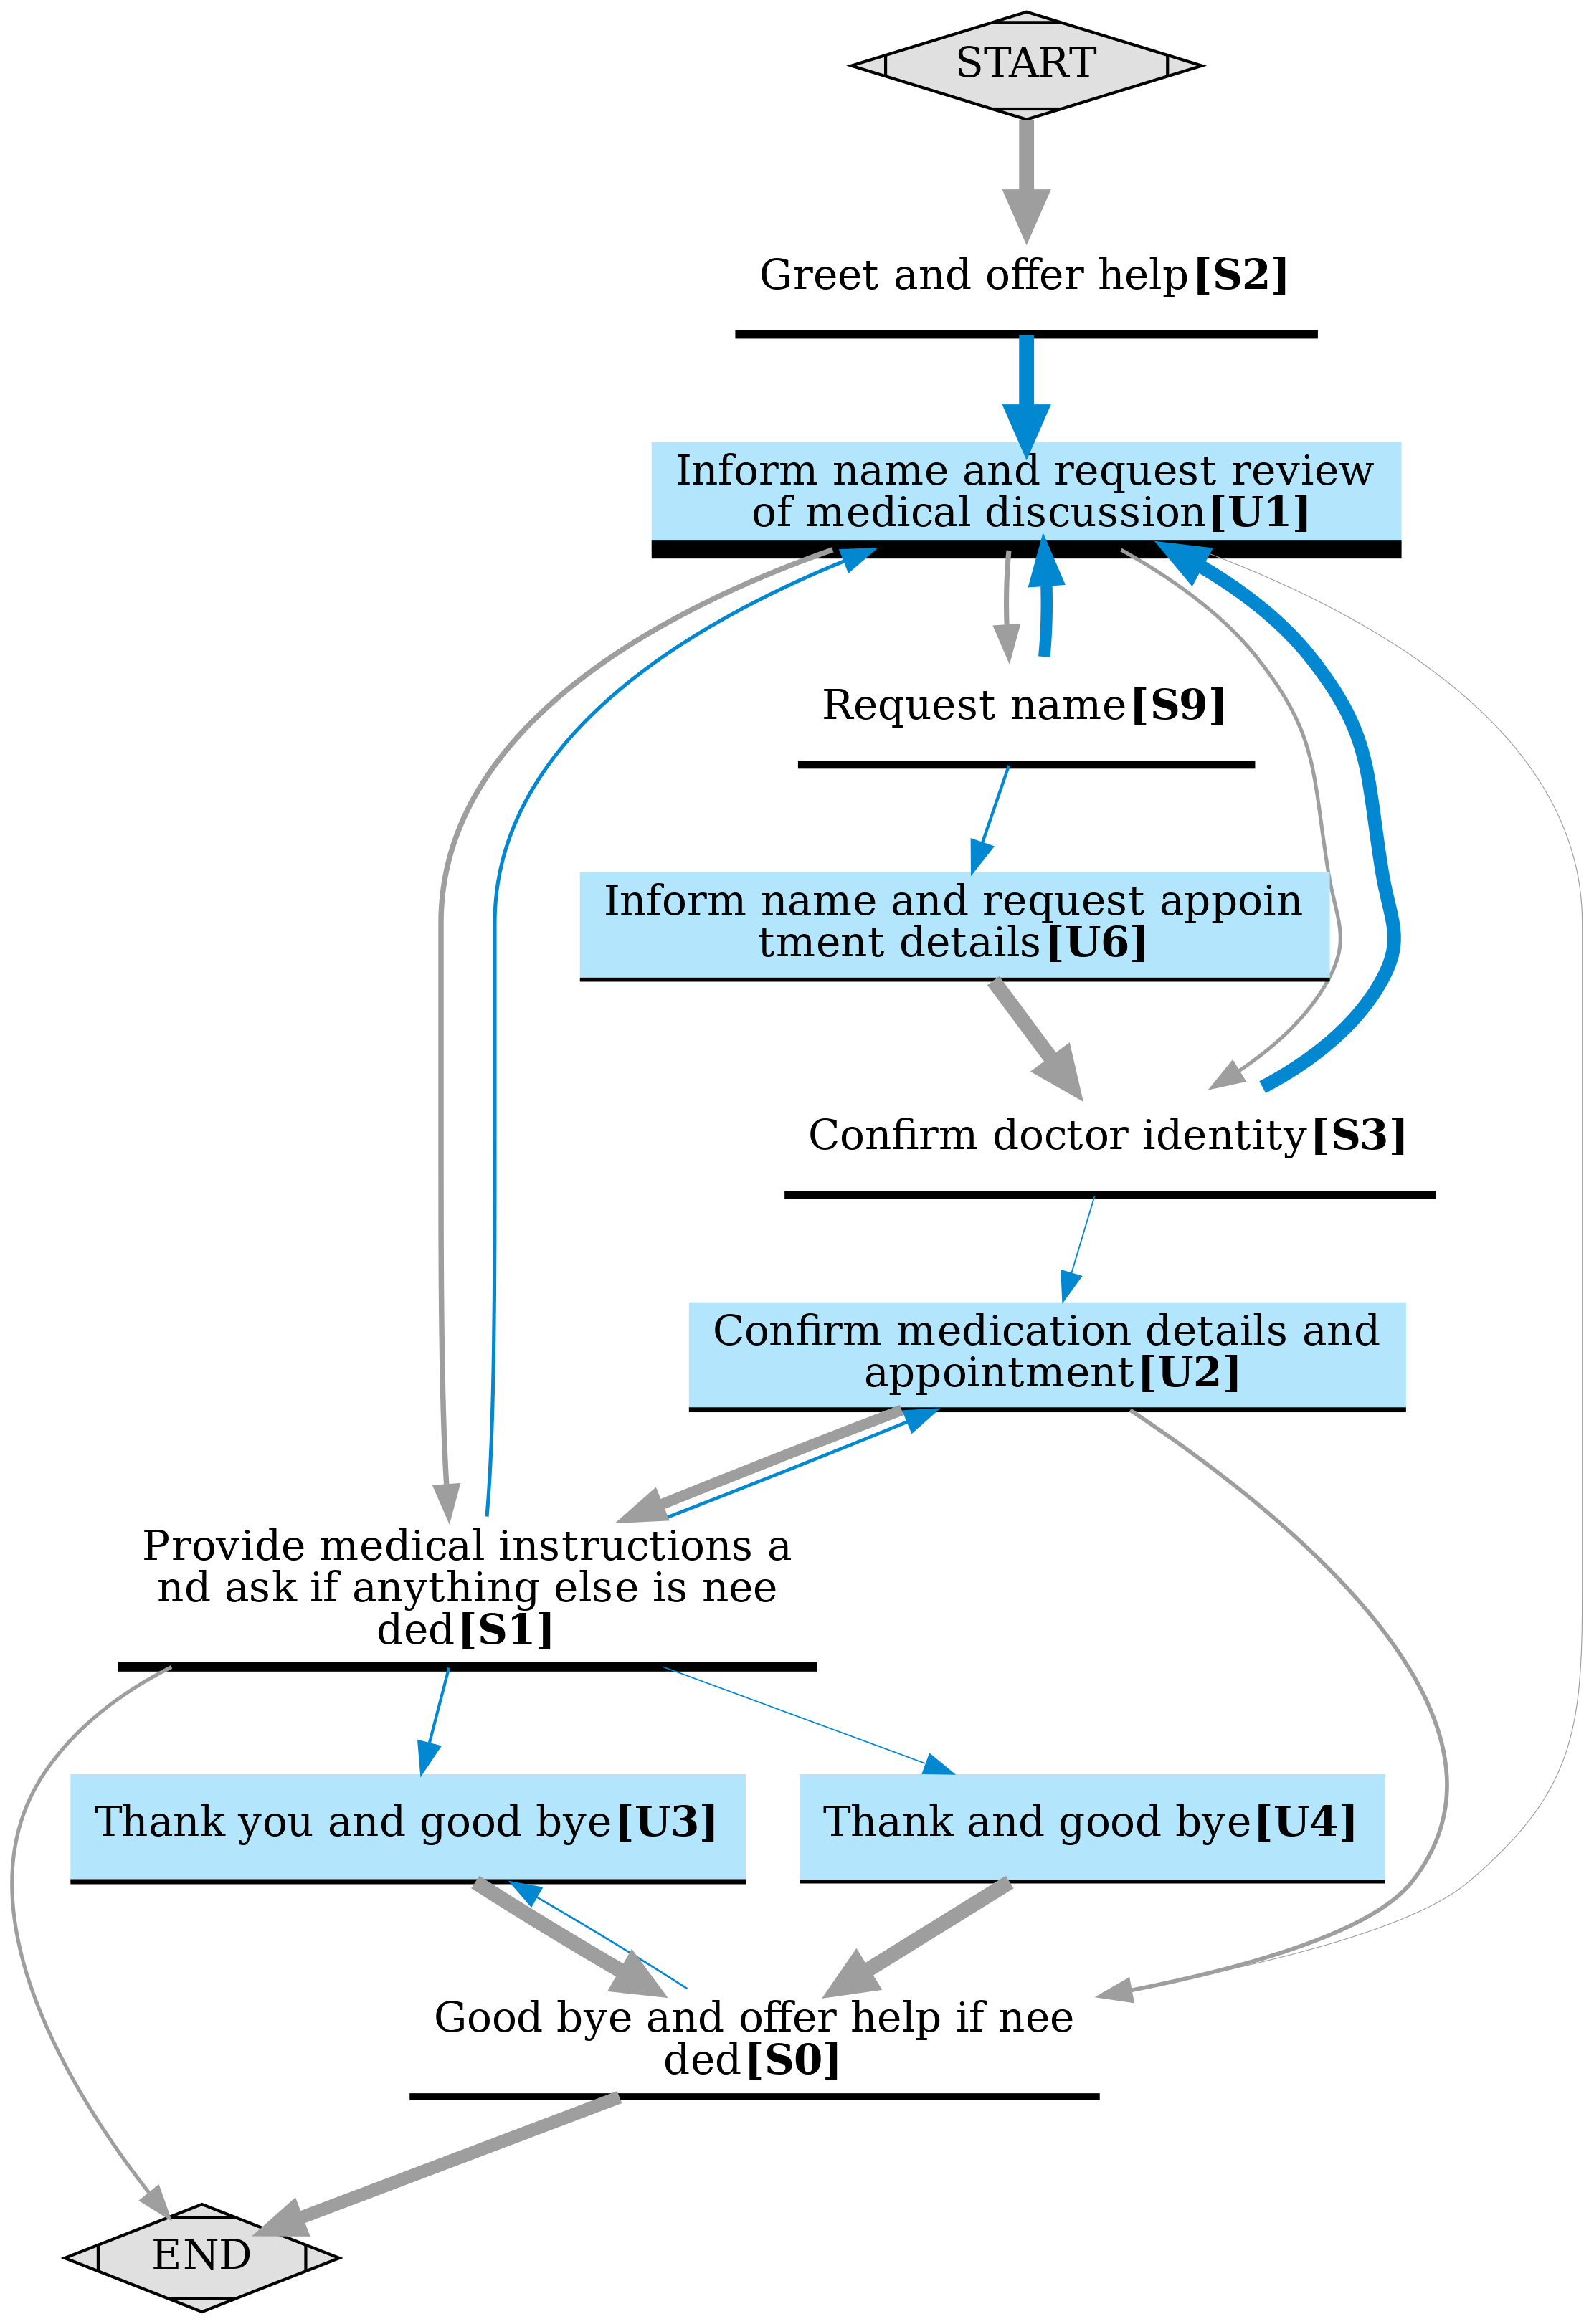

[2025-07-09 15:09:38] INFO:dialog2flow.build_graph:  Finished creating the graph.


In [18]:
PATH_ORCHESTRATION_DIALOGUES = "output/STAR/multi-agents+orchestration/txt"

_, nodes = dialog2graph(PATH_ORCHESTRATION_DIALOGUES, node_thresholds=.45)

if colab:
    display(Image.open("output/STAR/multi-agents+orchestration/txt/dialog2flow/graph/dialog2flow-joint-bert-base/graph.png"))

We can see this graph is more similar to the original one, where each node correspond to single actions and where there is no further details asked after the system `"Provide medical instructions and ask if anything else is needed [S1]"` :)

#### Extra details about `node_thresholds=0.45`

When calling `dialog2graph()` above, where did that `node_thresholds=.45` come from? this argument allow us to control the level of details of the graph.

More precisely, under the hood, it is the distance value for the agglomerative clustering algorithm to cluster utterances as different steps, therefore:

* The smaller the value, the smaller (more similar) the clusters, and the greater the number of discovered "steps" (nodes in the graph).
* That is, the smaller the `node_thresholds`, the more details represented in the final graph.

We can use the `dialog2trajectories` function to try to find a good threshold value, visually, using a dendrogram plot as follow:

[2025-07-09 15:09:50] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

Dialogues::   0%|          | 0/105 [00:00<?, ?it/s]

[2025-07-09 15:09:50] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 15:09:50] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering SYSTEM utterances...
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 4
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 524


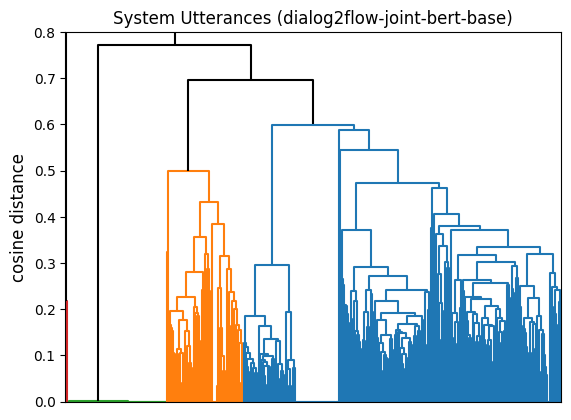

[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Dendrogram plot for system utterances saved in `output/STAR/multi-agents+orchestration/txt/dialog2flow/plots/dendrogram_dialog2flow-joint-bert-base.system.png`
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering USER utterances...
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 3
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:09:53] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 419


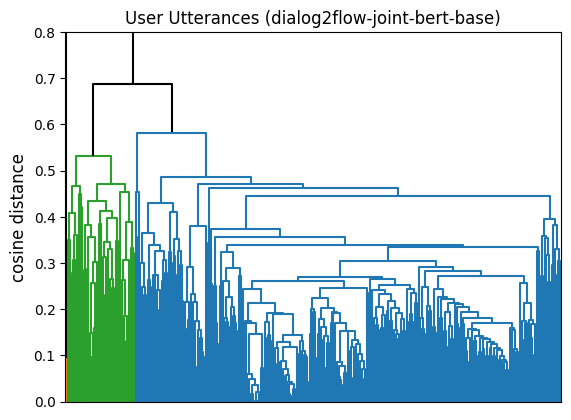

[2025-07-09 15:09:54] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Dendrogram plot for user utterances saved in `output/STAR/multi-agents+orchestration/txt/dialog2flow/plots/dendrogram_dialog2flow-joint-bert-base.user.png`


'output/STAR/multi-agents+orchestration/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json'

In [19]:
from sdialog.evaluation.dialog2flow import dialog2trajectories

dialog2trajectories(PATH_ORCHESTRATION_DIALOGUES)

We can clearly see that we need to decrease the threshold value since we have a very large (blue) cluster in both plots. This large blue cluster is clearly merging too many sub groups.

In fact, from the above plots we can see that a good value should be between 0.3 and 0.5, let's say we decide to use 0.45:

[2025-07-09 15:09:57] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

Dialogues::   0%|          | 0/105 [00:00<?, ?it/s]

[2025-07-09 15:09:58] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 15:09:58] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[2025-07-09 15:10:00] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering SYSTEM utterances...
[2025-07-09 15:10:00] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 10
[2025-07-09 15:10:00] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:10:00] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 524


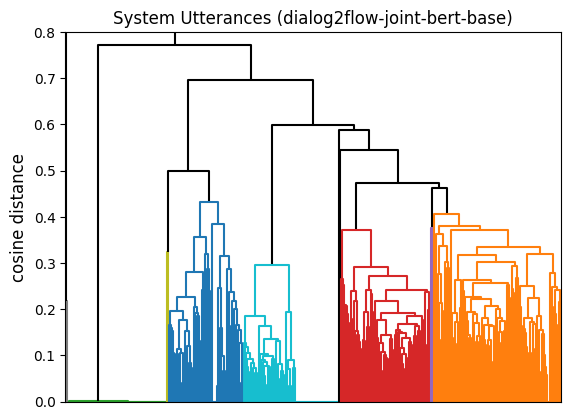

[2025-07-09 15:10:01] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Dendrogram plot for system utterances saved in `output/STAR/multi-agents+orchestration/txt/dialog2flow/plots/dendrogram_dialog2flow-joint-bert-base.system.png`
[2025-07-09 15:10:01] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering USER utterances...
[2025-07-09 15:10:01] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 12
[2025-07-09 15:10:01] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:10:01] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 419


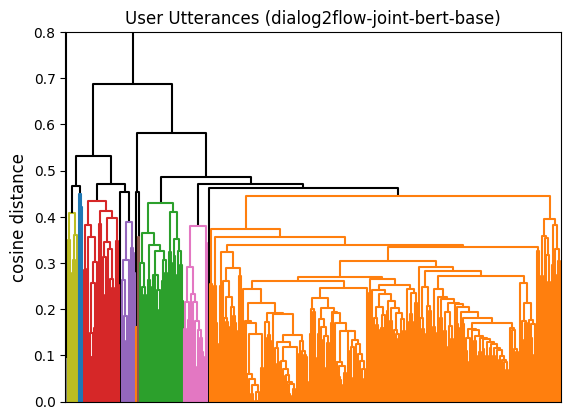

[2025-07-09 15:10:01] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Dendrogram plot for user utterances saved in `output/STAR/multi-agents+orchestration/txt/dialog2flow/plots/dendrogram_dialog2flow-joint-bert-base.user.png`


'output/STAR/multi-agents+orchestration/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json'

In [20]:
dialog2trajectories(PATH_ORCHESTRATION_DIALOGUES, thresholds=0.45)

That looks much better! :)

What happend now if we think that the threshold should be different between the user and the system? in fact, `dialog2trajectories()` can take two threshold values to control each.

In our example, we know system interactions should be simpler than user so make sense to use a "more abstract"/simpler steps to analyse the system than the user. Furthermore, let's say we believe/think to know the exact or a good number of actions to be discovered, we can pass to `dialog2flow()` or `dialog2trajectories()` directly the number of actions/steps too, instead of the threshold.

For instance, let's say that, based on the first plot, we think 10 clusters is good for the system, and a threshold of 0.3 for user is also good, then we can specify this as follows:

[2025-07-09 15:10:06] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

Dialogues::   0%|          | 0/105 [00:00<?, ?it/s]

[2025-07-09 15:10:06] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 15:10:06] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[2025-07-09 15:10:08] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering SYSTEM utterances...
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 10
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 524


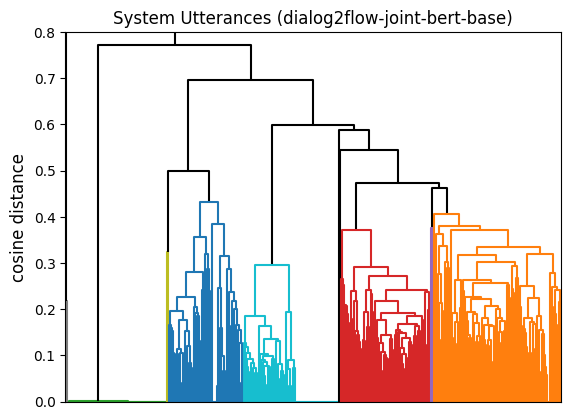

[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Dendrogram plot for system utterances saved in `output/STAR/multi-agents+orchestration/txt/dialog2flow/plots/dendrogram_dialog2flow-joint-bert-base.system.png`
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Clustering USER utterances...
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# clusters: 64
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:# Total predictions: 419


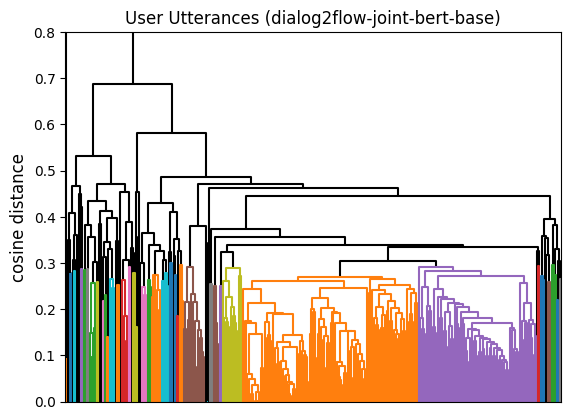

[2025-07-09 15:10:09] INFO:sdialog.evaluation.dialog2flow.extract_trajectories:Dendrogram plot for user utterances saved in `output/STAR/multi-agents+orchestration/txt/dialog2flow/plots/dendrogram_dialog2flow-joint-bert-base.user.png`


'output/STAR/multi-agents+orchestration/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json'

In [21]:
dialog2trajectories(PATH_ORCHESTRATION_DIALOGUES, thresholds=[10, 0.3])

Finally, once we find the right threshold values for right level of abstraction that is required by our analysis, then we can pass them to our `dialog2graph()` function using the `node_thresholds` argument:

[2025-07-09 15:10:15] INFO:dialog2flow.extract_trajectories:Reading conversations...


Dialogues::   0%|          | 0/106 [00:00<?, ?it/s]

[2025-07-09 15:10:15] INFO:dialog2flow.extract_trajectories:Using model 'sergioburdisso/dialog2flow-joint-bert-base' model to generate the embeddings.
[2025-07-09 15:10:15] INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sergioburdisso/dialog2flow-joint-bert-base


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

[2025-07-09 15:10:18] INFO:dialog2flow.extract_trajectories:Clustering SYSTEM utterances...


Cluster labels (System)::   0%|          | 0/10 [00:00<?, ?it/s]

[2025-07-09 15:10:18] INFO:dialog2flow.extract_trajectories:# clusters: 10
[2025-07-09 15:10:18] INFO:dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:10:18] INFO:dialog2flow.extract_trajectories:# Total predictions: 524
[2025-07-09 15:10:18] INFO:dialog2flow.extract_trajectories:Clustering USER utterances...


Cluster labels (User)::   0%|          | 0/64 [00:00<?, ?it/s]

[2025-07-09 15:10:31] INFO:dialog2flow.extract_trajectories:# clusters: 64
[2025-07-09 15:10:31] INFO:dialog2flow.extract_trajectories:# ground truth labels: None
[2025-07-09 15:10:31] INFO:dialog2flow.extract_trajectories:# Total predictions: 419
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:  Reading trajectories from (output/STAR/multi-agents+orchestration/txt/dialog2flow/trajectories-dialog2flow-joint-bert-base.json)...
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:    105 trajectories read.
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:  About to start creating the graph...
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:Found 3 unique labels with repeated nodes to marge
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:    > Number of nodes before mergin duplicates: 76
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:    > Number of nodes after mergin duplicates: 55
[2025-07-09 15:10:31] INFO:dialog2flow.build_graph:  #Nodes before pruning: 55
[2025-07-09 15:

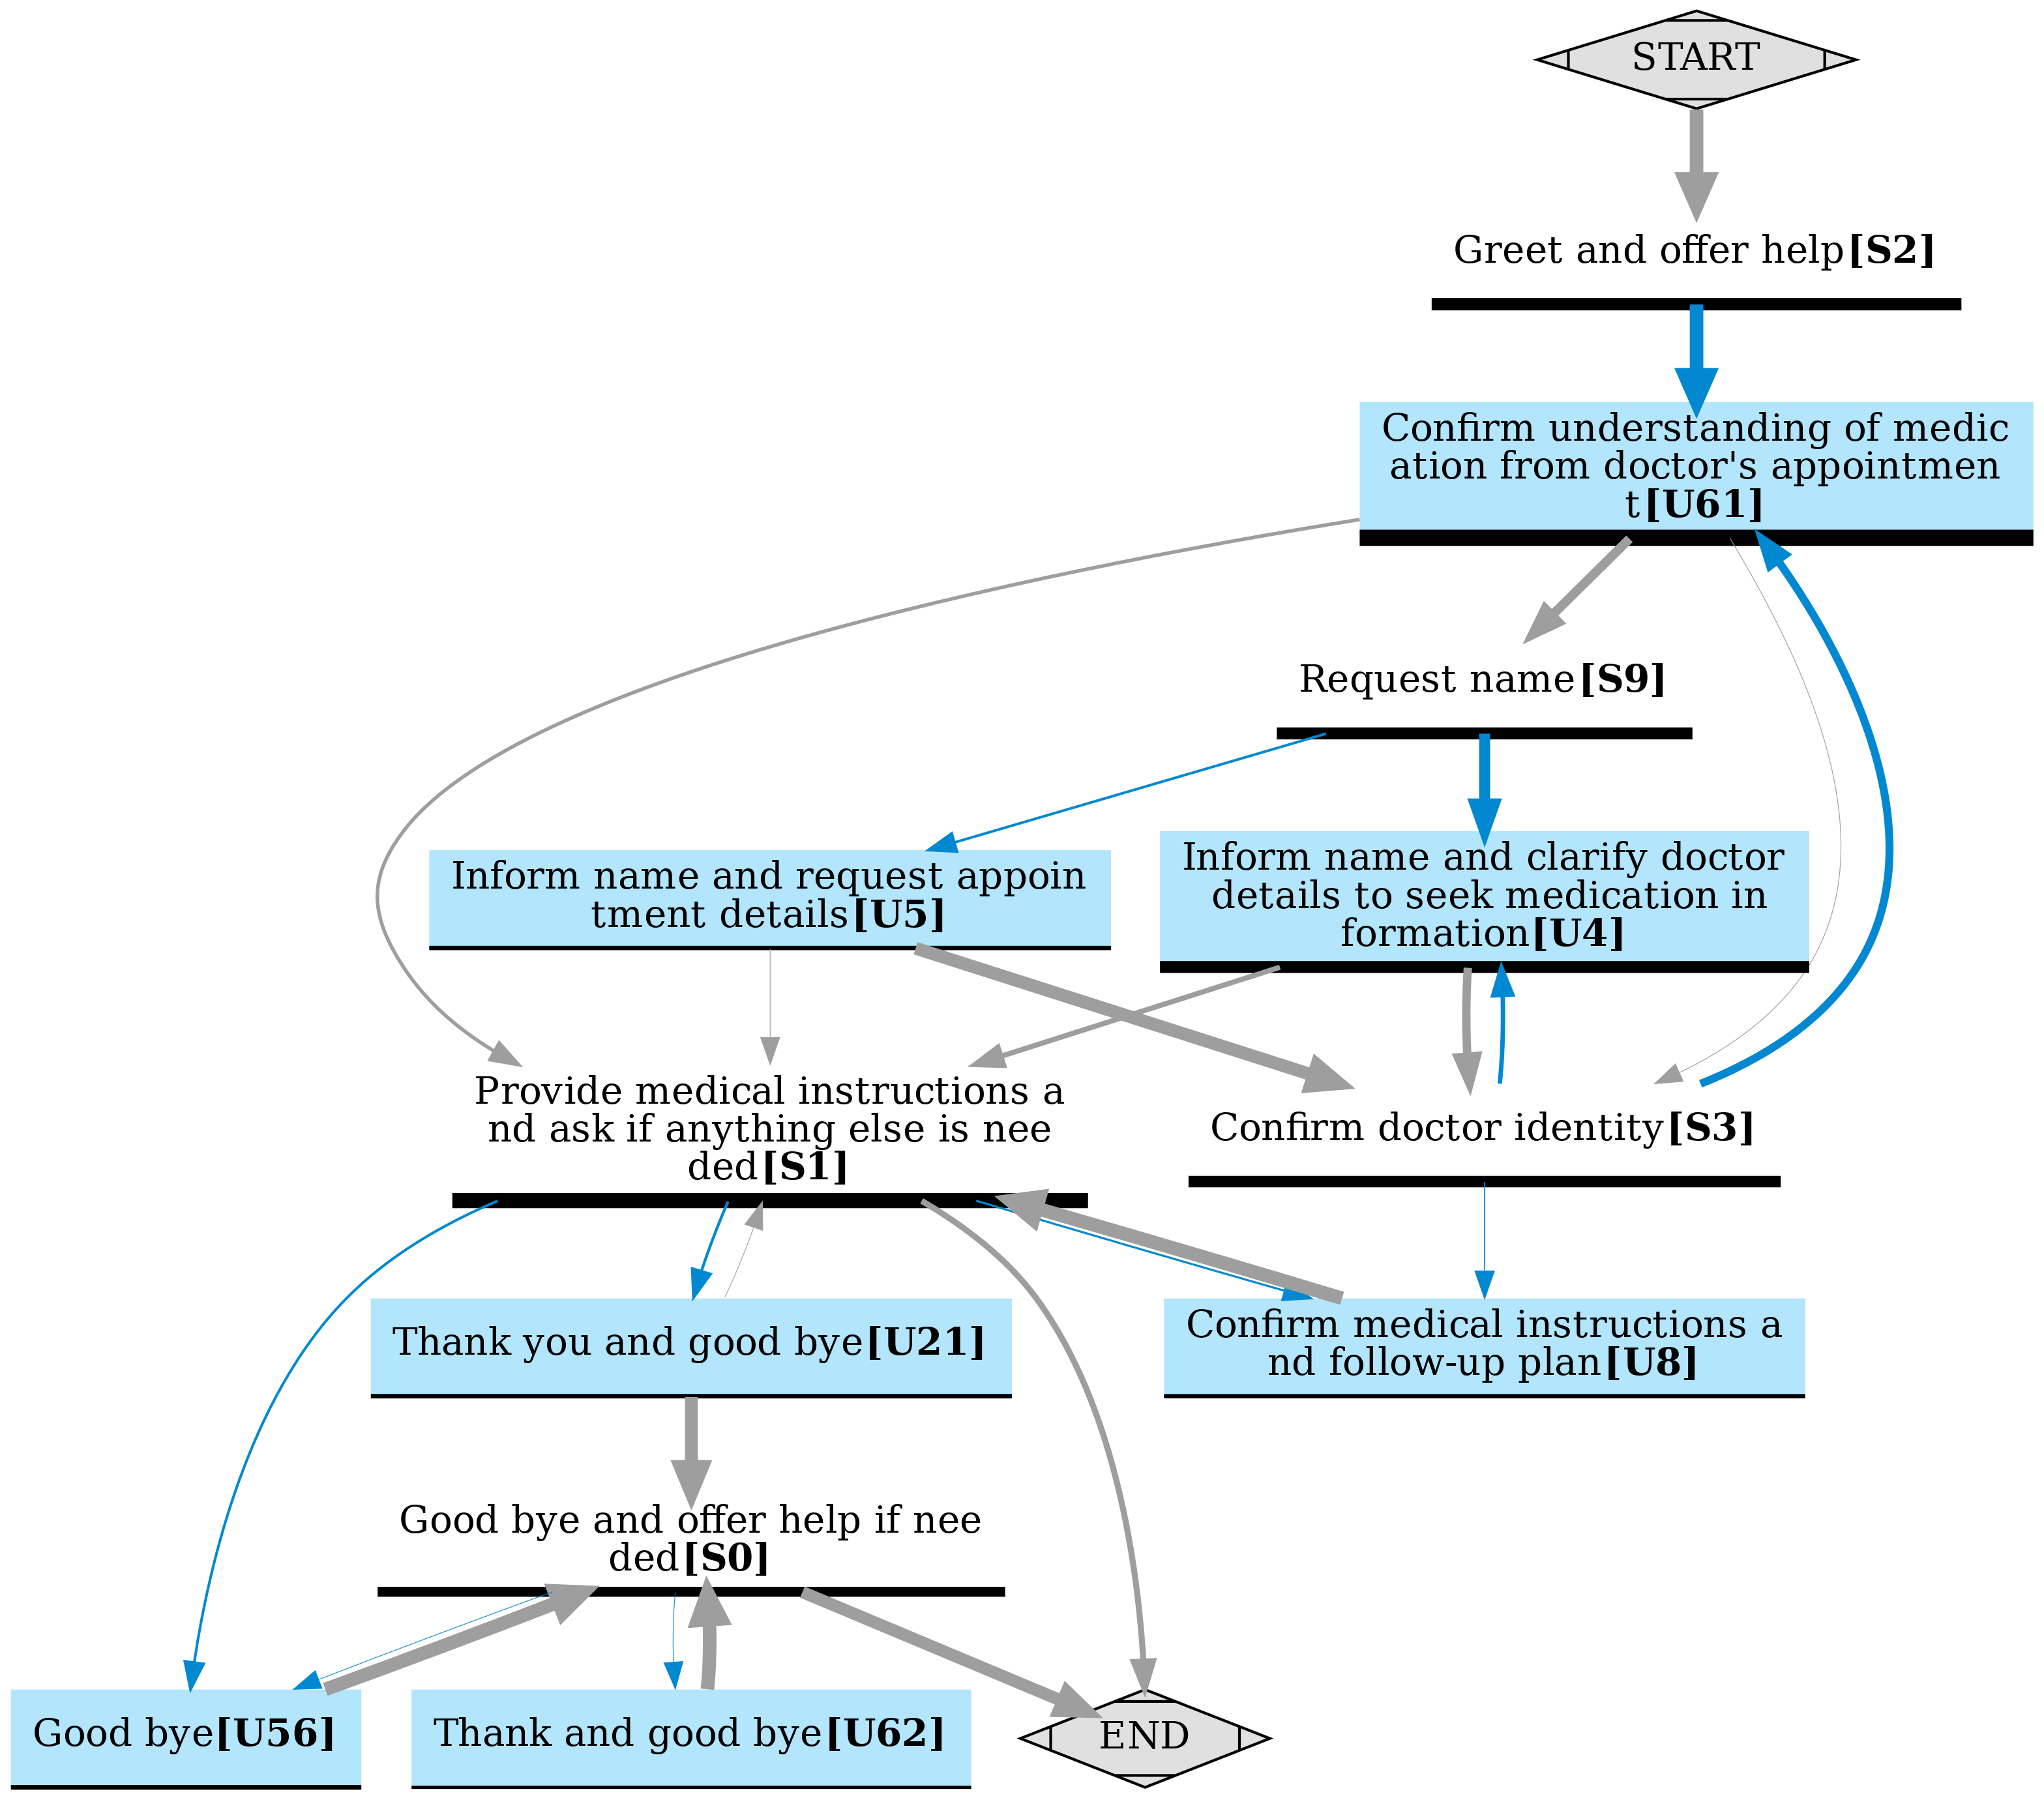

[2025-07-09 15:10:32] INFO:dialog2flow.build_graph:  Finished creating the graph.


In [22]:
_, _ = dialog2graph(PATH_ORCHESTRATION_DIALOGUES, node_thresholds=[10, 0.3])

if colab:
    display(Image.open("output/STAR/multi-agents+orchestration/txt/dialog2flow/graph/dialog2flow-joint-bert-base/graph.png"))

And that's it! you have reached the end of our series of tutorials. Well done! 💪😎 Take a cup of coffee, ☕ well deserved!